# **확률적 경사 하강법(Stochastic Gradient Descent, SGD)**

## 생각해 볼 문제
- 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달되는 상황에서 훈련을 어떻게 하는것이 좋을까요?
  - 1번째 방법 : 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련
    - 장점 : 매일 추가되는 새로운 데이터를 활용해 모델을 훈련할 수 있다.
    - 단점 : 시간이 지날수록 데이터가 늘어나는 것. 몇 달이 지나면 모델을 훈련하기 위해 서버를 늘여야 되는 상황 발생
  - 2번째 방법 : 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지
    - 장점 : 데이터셋의 크기가 너무 커지지 않을 수 있다.
    - 단점 : 데이터를 버릴 때 다른 데이터에 없는 중요한 데이터를 포함한 데이터가 버려질 수 있다는 점
    
=> 위에서 말하는 방법은 이전에 훈련한 모델을 버리고 다시 새로운 모델을 훈련하는 방식이다. 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까? 이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 생선을 까먹을 일도 없을 것이다.

=> 이런 식의 훈련 방식을 점진적 학습 또는 온라인 학습이라고 부른다. 대표적인 **점진적 학습 알고리즘**은 ** `확률적 경사 하강법(Stochastic Gradient Descent)` **이다. 사이킷런에서 확률적 경사 하강법을 위한 클래스를 제공한다.

### 확률적 경사 하강법
- 확률적이란 말은 '무작위하게' 혹은 '랜덤하게'의 기술적인 표현
- 경사라는 말은 기울기를 말하는 것
- 하강법은 내려가는 방법을 의미
- 경사 하강법은 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표이다. 하지만 한번에 걸음의 폭이 너무 크면 경사를 따라 내려가지 못하고 오히려 올라갈 수가 있다.
- 실제로 산에서 내려올 때는 조금씩 천천히 내려와야 한다. 경사하강법도 마찬가지이다. 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다. 이렇게 내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것

- 다시 확률적이란 말에 대해 이해해 봅시다. 경사하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 무엇일까요? 훈련 세트를 사용해 모델을 훈련하기 때문에 경사하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법이다.

- 정리해 보자면, 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려갑니다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려갑니다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다. 이제 모든 샘플을 다 사용했다. 그래도 산을 다 내려오지 못했으면 어떻게 할까? 간단하다. 다시 처음부터 시작하는 것!!  훈련 세트에 모든 샘플을 다시 채워넣고 다시 랜덤하게 하나의 샘플을 골라서 이어서 경사를 내려갑니다. 이렇게 만족할만한 위치에 도달할 때까지 계속 내려가면 된다.

#### 에포크(epoch)
- 확률적 경사하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크라고 부른다. 일반적으로 경사하강법은 수십, 수백 번 이상 에포크를 수행한다.

- 무작위로 샘플을 선택해 산에서 내려간다니 너무 무책임해 보일수 있다. 그래서 아주 조금씩 내려가야 한다. 걱정하는 것과는 달리 확률적 경사하강법은 꽤 잘 동작한다.

#### 미니배치 경사하강법(minibatch gradient descent)
- 한 개씩 말고 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 말하고 실제 아주 많이 사용된다.

#### 배치 경사하강법(batch gradient descent)
- 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방법
- 전체 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있다.
- 하지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다. 어떤 경우는 데이터가 너무너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모른다.

### 확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘이다. 그렇기 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어나갈 수 있다. 즉 다시 산꼭대기에서부터 시작할 필요가 없는 것이다.

#### 확률적 경사 하강법에서 내려가려고 하는 이 산은 도대체 무엇일까? 이 산이 바로 손실 함수라 부르는 것이다.

### 손실 함수(loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 그래서 손실함수의 값이 작을수록 좋은 것이다. 하지만 어떤 값이 최소값인지는 알지 못한다. 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을 것 같다.
- 다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다.

- 생선을 분류하기 위해서는 어떤 손실함수를 사용해야 하는지 알아보자.
- 생선 분류에서 손실은 아주 확실하다. 정답을 못 맞히는 것이다.
- 이해를 위해 도미와 빙어를 구분하는 이진 분류 문제를 예로 보자.
- 아래와 같이 예측과 정답이 있다고 가정하고 생각해 보자.
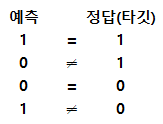

- 정확도는 얼마? 4개의 예측 중에 2개만 맞았으므로 정확도는 2/4 = 0.5이다. 정확도를 손실함수로 사용할 수 있을까? 예를 들어 정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0 이 가장 높다. 손실 함수로 괜찮지 않을까?
- 하지만 정확도에는 치명적인 단점이 있다. 위 그림처럼 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯 가지 뿐이다.경사 하강법은 아주 조금씩 내려온다고 했는데 이렇게 듬성듬성하다면 경사하강법을 이용해 조금씩 내려올 수 없다. 산의 경사면은 확실히 연속적이어야 한다. 즉, 미분 가능해야 한다.
- 그럼 어떻게 연속적인 손실 함수를 만들 수 있을까? 앞에서 로지스틱회귀 모델이 확률을 출력할 수 있었다. 예측은 0 또는 1이지만 확률은 0 ~ 1 사이의 어떤 값도 될 수 있었다. 즉, 연속적이었다.
- 로지스틱회귀 모델의 확률값을 이용해서 로지스틱 손실함수를 만들 수 있다. 다른 말로 이진 크로스엔트로피 손실함수라고도 한다.
- 다중 분류에서 사용하는 손실함수를 크로스엔트로피 손실함수라고 한다.

##### 손실 함수를 우리가 직접 만드는 일은 거의 없다. 이미 문제에 잘 맞는 손실함수가 개발되어 있기 때문이다. 이진 분류는 로지스틱 손실함수를 사용하고 다중 분류는 크로스엔트로피 손실함수를 사용한다.

##### 손실 함수를 직접 계산하는 일도 드물다. 머신러닝 라이브러리가 처리해 주니까 걱정할 필요가 없다. 손실함수가 무엇인지, 왜 정의를 해야하는지 이해하는 것이 중요하다.

In [82]:
# pandas 임포트, Fish.csv 파일 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
# [데이터 확인] fish 데이터프레임에서 처음 5개 데이터만 출력
fish_df = pd.read_csv('data/Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
# Lenght1 컬럼 삭제, 컬럼이름 변경( Length2 -> Length , Length3 -> Diagonal)
fish_df = fish_df.rename(columns={'Length3':'Diagonal'})
fish_df = fish_df.drop(columns=['Length1'])

In [11]:
# [작업 실행 확인] fish 데이터프레임에서 처음 5개 데이터만 출력
fish_df.head()

,Species,Weight,Length2,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
# Species 컬럼을 제외한 5개의 컬럼은 입력 데이터로 사용, Species 컬럼은 타깃 데이터로 사용, 넘파이 배열로 변경
fish_input = fish_df.drop(columns=['Species']).to_numpy()
fish_target = fish_df['Species'].to_numpy()

In [13]:
# 사이킷런의 train_test_split() 사용해서 훈련세트와 테스트세트로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

In [14]:
# 훈련세트와 테스트세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

- 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier 이다.

In [57]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #  loss 로지스틱 손실 함수 
sgd.fit(X_train_scaled, y_train)

C:\Users\kj\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

- SGDClassifier의 객체를 만들때는 2개의 매개변수를 지정
  - loss : 손실함수의 종류 지정, loss = 'log_loss' => 로지스틱 손실함수 지정
  - max_iter : 수행할 에포크 횟수 지정

In [60]:
print(sgd.score(X_train_scaled, y_train))
print(sgd.score(X_test_scaled, y_test))

0.773109243697479
0.775


- 출력된 훈련세트와 테스트세트 정확도가 낮다. 아마 지정한 반복횟수 10번이 부족한 것으로 보인다.
- 그리고 ConvergenceWarning 이 뜬다. 이 경고는 모델이 충분히 수렴하지 않았기 때문에 나오는 것인데 오류가 아니라 경고이므로 실습에서는 그냥 진행

- 확률적 경사 하강법은 점진적 학습이 가능하다. SGCClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해 보자.
- 모델을 이어서 훈련할 때는 partial_fit() 함수를 사용
- 이 함수는 fit() 함수와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련한다.
- partial_fit() 함수를 호출하고 다시 훈련세트와 테스트세트의 점수를 확인해 보자

In [62]:
sgd.partial_fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [64]:
print(sgd.score(X_train_scaled, y_train))
print(sgd.score(X_test_scaled, y_test))

0.8151260504201681
0.85


- 아직 점수가 낮지만 에포크를 한번 더 실행하니 정확도가 향상되었다. 이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있겠다.
- 그런데 얼마나 더 훈련해야 할까? 무작정 많이 반복할 수는 없고 어떤 기준이 필요해 보인다.

### 에포크와 과대/과소적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 마치 산을 다 내려오지 못하고 훈련을 마치는 셈이다.
- 에포크 횟수가 많으면 훈련 세트를 완전히 학습할 것이다. 훈련 세트에 아주 잘 맞는 모델이 만들어 진다.
- 바꾸어 말하면 적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.
- 반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다. 바로 이 지점이 모델이 과대적합되기 시작하는 곳이다. 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료(early stopping)라고 한다.
- 우리가 준비한 데이터셋으로 그래프를 그려 눈으로 확인해 보자
- 확인할 예제에서는 반복문을 사용해서 훈련 세트와 테스트 세트의 점수를 저장하고 저장된 점수로 그래프를 그려볼 것이기 때문에 fit() 함수를 사용하지 않고 partial_fit() 함수만 사용한다. partial_fit() 함수만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 함수의 전달해 주어야 한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 그리고 에포크마다 훈련세트와 테스트세트에 대한 점수를 기록하기 위해 2개의 리스트 준비

In [68]:
# 넘파이 임포트, SGDClassifier 클래스 생성(loss='log_loss', random_state=42)
sc = SGDClassifier(loss='log_loss', random_state=42)
#sc.fit(X_train_scaled, y_train)

# 훈련세트와 테스트세트 점수 저장할 리스트 선언
train_score = []
test_score = []

# 훈련세트의 전체 레이블 목록 만들기
classes = np.unique(y_train)
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [74]:
# 300번의 에포크 동안 훈련 반복
# 반복할 때마다 훈련세트와 테스트세트의 점수를 리스트에 추가

for _ in range(0, 300):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)
    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))
    

- 파이썬의 _ 는 특별한 변수이다. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용

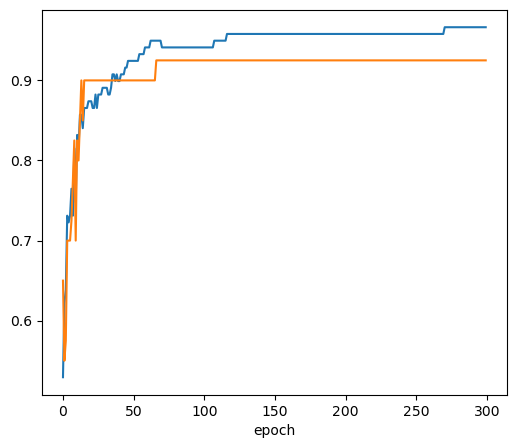

In [109]:
# 300번의 에포크 동안 기록한 훈련세트와 테스트세트의 점수를 그래프로 그려보자
plt.figure(figsize=(6,5))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')

plt.show()

- 100번째 에포크 이후에는 훈련세트와 테스트세트의 점수가 조금씩 벌어지고 있다.
- 에포크 초기에는 과소적합되어 훈련세트와 테스트세트의 점수가 낮다.
- 이 모델의 경우에는 100번째 에포크가 적절한 반복 횟수로 보인다.

In [111]:
# SGDClassifier의 반복횟수를 100에 맞추고 모델을 다시 훈련
# 최종적으로 훈련세트와 테스트세트에서 점수 출력

for _ in range(0, 100):
    sc.partial_fit(X_train_scaled, y_train)

print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))


0.9663865546218487
0.925


- SGD Classifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
- tol 매개변수에서 향상될 최솟값을 지정
- tol=None 으로 지정해서 max_iter에서 지정한 반복횟수 동안 반복하도록 지정

In [113]:
sgd = SGDClassifier(tol=None) # tol=0.001 최솟값이 0.001이 오르지 않으면 조기 종료 시켜버린다 

In [32]:
# SGDClassifier의 반복횟수를 100에 맞추고 모델을 다시 훈련
# 최종적으로 훈련세트와 테스트세트에서 점수 출력


- loss를 지정하지 않으면 'hinge' 손실이 기본